# **Customers analysis with RFM model**

## Introduction 

### 1. Business background

Pizza Hut is a leading pizza brand in Vietnam with 130 stores. Due to Covid-19, customers now demand more culinary experiences, so the brand has implemented renovation campaigns and opened two signature stores with new design concepts to improve the dine-in quality. It helps customers reduce queuing time by applying the Bring Your Own Device (BYOD) feature when ordering at the table. Pizza Hut also regularly introduces product innovations to suit Vietnamese tastes. The communication activities have attracted a vibrant discussion on social networks. However, the market is becoming more competitive, so gaining additional insights from data analysis is critical.

### 2. Dataset

- Dataset: Purchasing data
- Dataset stores information about sales invoices. The data include 1048575 observations.
- Data dictionary:

|       Column       |      Description        |
| :------------:|:-------------:|
|    Bill_ID        |      The unique ID of the order     |
|     Channel        |      The channel through which the order was consumed     |
|     OrderFrom         | The location through which the order was made          |
|    TransactionDate        |The date of the order    |
|     SalesAmount        |       The amount customer paid for the order     |
|     CustomerID         | The unique ID of the customer          |
|    CustomerGender        |     The gender of the customer     |
|     VoucherStatus        |     Whether a voucher was used for the order      |
|     Province         | The general location of where the order was made            |

### 3. Business Question

- Describe the portrait of customers and provide insights into their behavior.
- Using the RFM model, segment customers into different groups.

## Exploring Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format

### Loading Data

In [216]:
df = pd.read_excel('D:\\DATA ANALYST\\level 3\\Class 3 - Data Manipulation With Python\Homework\\Class 3 _ Pizzahut - RFM\\De bai\\Round 2 - Data set.xlsx', sheet_name = 'Purchasing data')
df.head()

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891,1753863,Unknown,No,Ho Chi Minh City
1,1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782,1124050,Unknown,No,Hanoi
2,2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792,1626827,Male,No,Hanoi
3,3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762,125643,Male,No,Hanoi
4,4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031,2117237,Unknown,No,Hanoi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Unnamed: 0       1048575 non-null  int64 
 1   BillID           1048575 non-null  int64 
 2   Channel          1048575 non-null  object
 3   OrderFrom        1048575 non-null  object
 4   TransactionDate  1048575 non-null  object
 5   SalesAmount      1048575 non-null  int64 
 6   CustomerID       1048575 non-null  int64 
 7   CustomerGender   1048575 non-null  object
 8   VoucherStatus    1048575 non-null  object
 9   Province         1048575 non-null  object
dtypes: int64(4), object(6)
memory usage: 80.0+ MB


### Processing Data

In [ ]:
# Simply process the data 

df = df.iloc[:, 1:]
df['BillID'] = df['BillID'].astype('str')
df['CustomerID'] = df['CustomerID'].astype('str')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   BillID           1048575 non-null  object             
 1   Channel          1048575 non-null  object             
 2   OrderFrom        1048575 non-null  object             
 3   TransactionDate  1048575 non-null  datetime64[ns, UTC]
 4   SalesAmount      1048575 non-null  int64              
 5   CustomerID       1048575 non-null  object             
 6   CustomerGender   1048575 non-null  object             
 7   VoucherStatus    1048575 non-null  object             
 8   Province         1048575 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 72.0+ MB


### Describe customers

[Text(0.5, 1.0, 'Customer by Channel')]

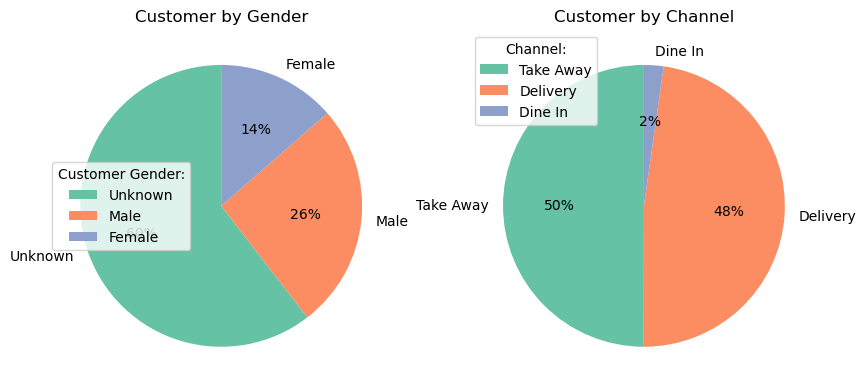

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 15], facecolor = None)

values = df['CustomerGender'].value_counts().sort_values(ascending=False)
labels = df['CustomerGender'].unique()
ax1.pie(values, labels=labels, startangle = 90, colors=sns.color_palette("Set2"), autopct='%1.0f%%')
ax1.legend(title = "Customer Gender:")
ax1.set(title='Customer by Gender')

values = df['Channel'].value_counts().sort_values(ascending=False)
labels = df['Channel'].unique()
ax2.pie(values, labels=labels, startangle = 90, colors=sns.color_palette("Set2"), autopct='%1.0f%%')
ax2.legend(title = "Channel:")
ax2.set(title='Customer by Channel')

[Text(0.5, 1.0, 'Customer by Province')]

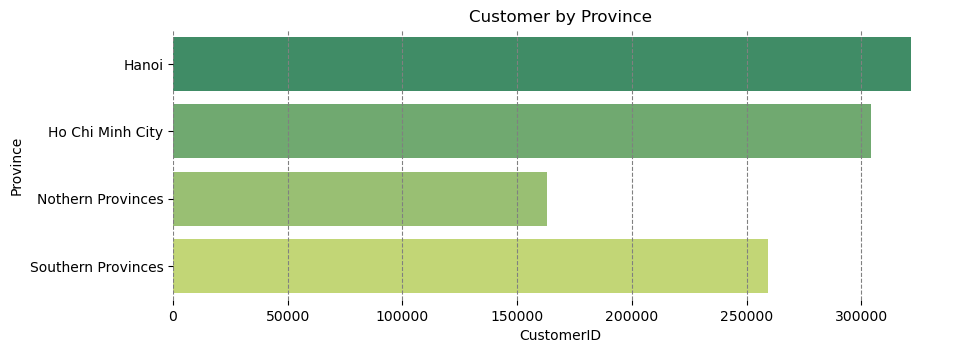

In [ ]:
fig, ax = plt.subplots(figsize=(10,3.5))
cus_province = df.groupby('Province')['CustomerID'].count().reset_index()

sns.barplot(x= "CustomerID", y= "Province", palette= 'summer', orient='h', data = cus_province)
sns.despine(bottom=True, left=True)
plt.grid(axis = 'x', color = 'gray', linestyle = '--')
ax.set(title= 'Customer by Province')

[Text(0.5, 1.0, 'Total GMV by Province')]

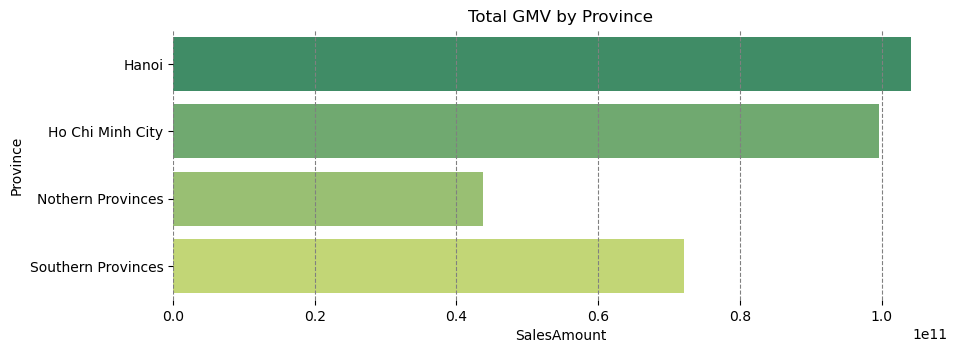

In [ ]:
fig, ax = plt.subplots(figsize=(10,3.5))
gmv_province = df.groupby(["Province"]).sum(['SalesAmount']).reset_index()

sns.barplot(x= "SalesAmount", y= "Province", palette= 'summer', orient='h', data = gmv_province)
sns.despine(bottom=True, left=True)
plt.grid(axis = 'x', color = 'gray', linestyle = '--')
ax.set(title= 'Total GMV by Province')

Text(0.5, 1.0, 'Type of orders by province')

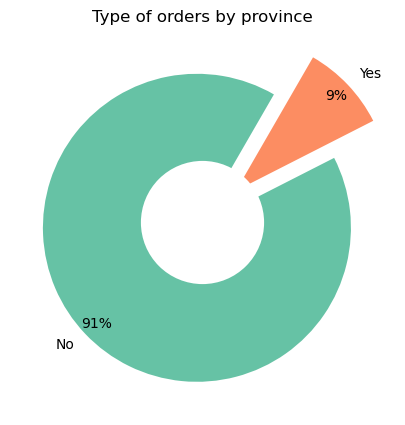

In [ ]:
fig, ax  = plt.subplots(figsize=(10, 5))
explode = ( 0.05, 0.3)
labels = ["No","Yes"]
sizes = df["VoucherStatus"].value_counts()
ax.pie(sizes, 
       explode=explode, 
       colors=sns.color_palette("Set2"),
       startangle=60,
       labels=labels,
       autopct='%1.0f%%',
       pctdistance=0.9)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.title("Type of orders by province")

Text(0.5, 1.0, 'Type of orders by province')

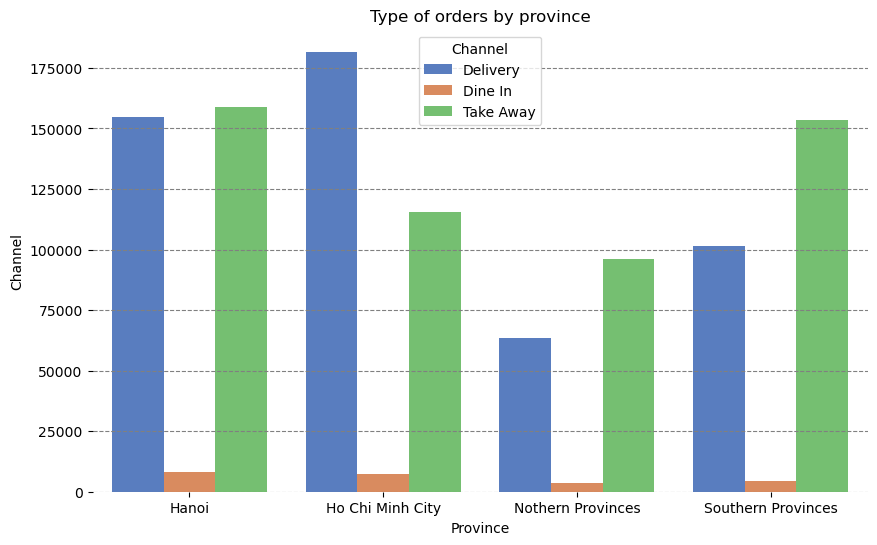

In [ ]:
order_channel_counts = (
    df.groupby(["Province", "Channel"])
    .size()
    .to_frame(name="Count")
    .reset_index()
)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="Province", y="Count", hue="Channel", errorbar=None, palette="muted", data=order_channel_counts)
plt.grid(axis = 'y', color = 'gray', linestyle = '--')
sns.despine(bottom=True, left=True)
plt.xlabel("Province")
plt.ylabel("Channel")
plt.title("Type of orders by province")

#### Customer Analysis:

- Unknow customers: These could be walk-in customers who have not registered for a membership.
- Member customers: The majority are female, with nearly twice as many female customers as male customers.
- Dine-in: This is the least popular type of order, accounting for only 2% of all transaction data.
- Takeaway and delivery: These are the most popular types of orders.
- Customers from Ho Chi Minh City: They make up the majority of customers.
- Hanoi: Ranks first in total sales revenue.
- Voucher usage rate: It is very low, at less than 10%.
- Ho Chi Minh City customers: They prefer the delivery option the most. While other Southern provinces prefer the take-away option more.

### RFM Analysis in Python - Customer Segmentation

**Customer segmentation** is the practice of grouping customers based on common characteristics. These customer segments are beneficial in marketing campaigns, in identifying potentially profitable customers, and in developing customer loyalty. A company might segment customers according to a wide range of factors, including: demographics (age, gender, location etc), behaviour (previous orders, responses to messaging), psychographics (values, interests, lifestyles) etc.

**RFM (Recency-Frequency-Monetary)** analysis is a simple technique for behaviour based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy. It is a handy method to find the best customers, understand their behavior and then run targeted marketing campaigns to increase sales, satisfaction and customer lifetime value.

The goal of this analysis is to identify customer segments for fast food chain company using RFM analysis and to understand how those groups differ from each other.

In [ ]:
df['TransactionDate'] = df['TransactionDate'].dt.date
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.head(5)

,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,Take Away,CALL CENTER,2021-10-01,296891,1753863,Unknown,No,Ho Chi Minh City
1,1,Take Away,STORE,2021-10-01,301782,1124050,Unknown,No,Hanoi
2,2,Take Away,WEBSITE,2021-10-01,319792,1626827,Male,No,Hanoi
3,3,Take Away,STORE,2021-10-01,424762,125643,Male,No,Hanoi
4,4,Delivery,STORE,2021-10-01,280031,2117237,Unknown,No,Hanoi


In [217]:
df['CustomerID'].nunique()

583642

In [218]:
df['CustomerID'].count()

1048575

#### Recency, Frequency, Monetary
RFM model combines three different customer attributes to rank customers:

- **Recency (R)**: Who have purchased recently? Number of days since last purchase
- **Frequency (F)**: Who has purchased frequently? The total number of purchases
- **Monetary (M)**: Who has high purchase amount? The total money customer spent


If the customer bought in recent past, he gets higher points. If he bought many times, he gets higher score. And if he spent a lot of money, he gets more points.

In [ ]:
# calculate date diff
day = df['TransactionDate'].max() + timedelta(days=1)

rfm = df.groupby('CustomerID').agg(
    last_ord_date=('TransactionDate', 'max'),
    Recency=('TransactionDate', lambda x : (day - x.max())),
    Frequency=('BillID', 'count'),
    Monetary=('SalesAmount', 'sum')
).reset_index()
rfm['Recency'] = rfm['Recency'].dt.days
rfm.head()

,CustomerID,last_ord_date,Recency,Frequency,Monetary
0,0,2021-12-24,382,1,411663
1,1,2022-03-07,309,1,105503
2,10000,2023-01-07,3,1,145127
3,1000000,2021-11-07,429,1,190147
4,1000001,2022-06-18,206,5,2416216


In [ ]:
rfm.describe()

,last_ord_date,Recency,Frequency,Monetary
count,583642,"583,642.00","583,642.00","583,642.00"
mean,2022-06-03 04:00:40.167088896,220.83,1.80,"547,735.42"
min,2021-10-01 00:00:00,1.00,1.00,"7,148.00"
25%,2022-02-07 00:00:00,102.00,1.00,"201,289.00"
50%,2022-06-06 00:00:00,218.00,1.00,"311,816.00"
75%,2022-09-30 00:00:00,337.00,2.00,"567,481.25"
max,2023-01-09 00:00:00,466.00,238.00,"133,774,476.00"
std,NaN,135.50,2.27,"880,392.03"


In [ ]:
# calculate RFM score
rfm['R'] = rfm['Recency'].apply(lambda x : 1 if x >= 403 else ( 2 if x >= 345 and x < 403 
                                                                                  else ( 3 if x >= 287 and x < 345
                                                                                        else 4)))
rfm['F'] = rfm['Frequency'].apply(lambda x : 2 if x >= 1 and x < 2 else (4))
rfm['M'] = rfm['Monetary'].apply(lambda x : 4 if x >= 567481.2 else ( 3 if x >= 311816 and x < 567481.2 
                                                                                  else ( 2 if x >= 201289 and x < 311816
                                                                                        else 1)))
rfm['RFM'] = rfm['R'].astype('str') + rfm['F'].astype('str') + rfm['M'].astype('str')
rfm

,CustomerID,last_ord_date,Recency,Frequency,Monetary,R,F,M,RFM
0,0,2021-12-24,382,1,411663,2,2,3,223
1,1,2022-03-07,309,1,105503,3,2,1,321
2,10000,2023-01-07,3,1,145127,4,2,1,421
3,1000000,2021-11-07,429,1,190147,1,2,1,121
4,1000001,2022-06-18,206,5,2416216,4,4,4,444
...,...,...,...,...,...,...,...,...,...
583637,99998,2022-03-06,310,1,159653,3,2,1,321
583638,999984,2022-01-05,370,1,176064,2,2,1,221
583639,999985,2022-07-01,193,1,415034,4,2,3,423
583640,999987,2021-11-01,435,1,168534,1,2,1,121


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17304\107874860.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


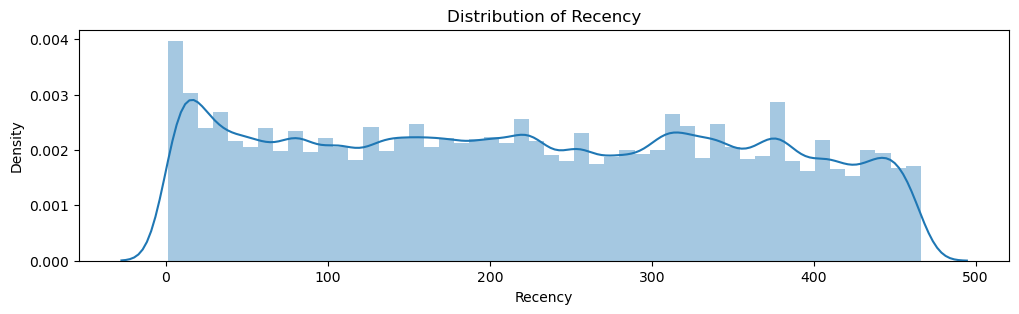

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17304\107874860.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


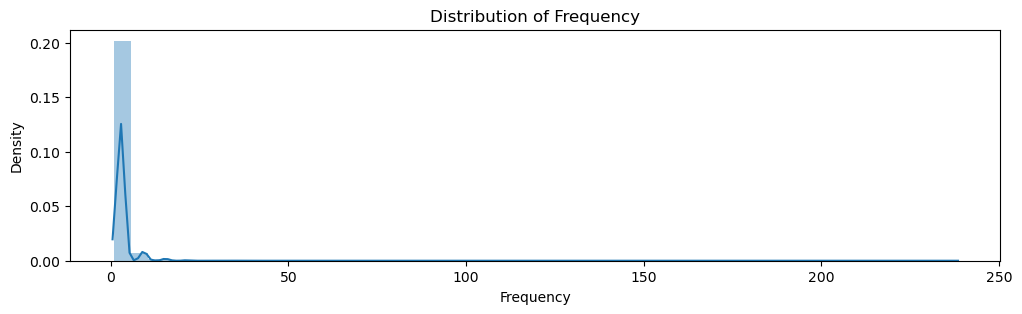

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17304\107874860.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


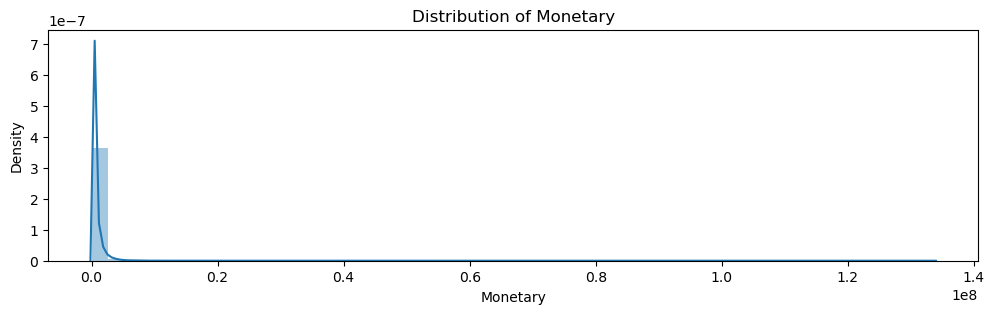

In [165]:
colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

Text(0, 0.5, 'Number of Customers')

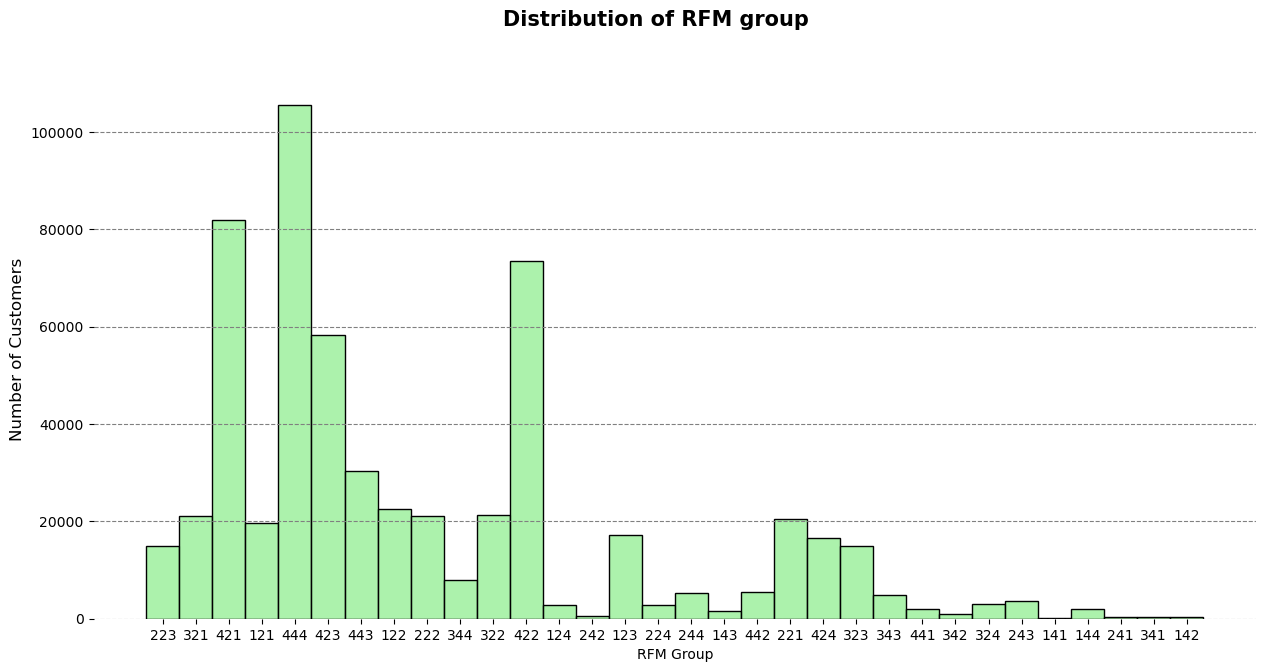

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(data= rfm, x="RFM", color="lightgreen")

ax.yaxis.grid(color = 'gray', linestyle = 'dashed')
sns.despine(bottom=True, left=True)
plt.suptitle('Distribution of RFM group', fontweight = 'bold', size = 15)
plt.xlabel('RFM Group')
plt.ylabel('Number of Customers', size = 12)

#### RFM Customer Segments

-  **VIP** - bought recently, buy often and spend the most
- **Potential customers** - recent customers, bought more than once but not often
- **Loyal Customers** - spend good money and often
- **About to sleep** - below average recency, frequency and monetary values; will lose them if not reactivated
- **Hibernating** - last purchase was long back

In [ ]:
segt_map = {
    r'44': 'VIP',
    r'[3-4]2': 'Potential customers',
    r'[2-3]4': 'Loyal customers',
    r'22': 'About to sleep',
    r'1[2-4]': 'Hibernating'
} #14.

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,CustomerID,last_ord_date,Recency,Frequency,Monetary,R,F,M,RFM,Segment
0,0,2021-12-24,382,1,411663,2,2,3,223,About to sleep
1,1,2022-03-07,309,1,105503,3,2,1,321,Potential customers
2,10000,2023-01-07,3,1,145127,4,2,1,421,Potential customers
3,1000000,2021-11-07,429,1,190147,1,2,1,121,Hibernating
4,1000001,2022-06-18,206,5,2416216,4,4,4,444,VIP


[Text(0.5, 1.0, 'Number of customers in each Segment')]

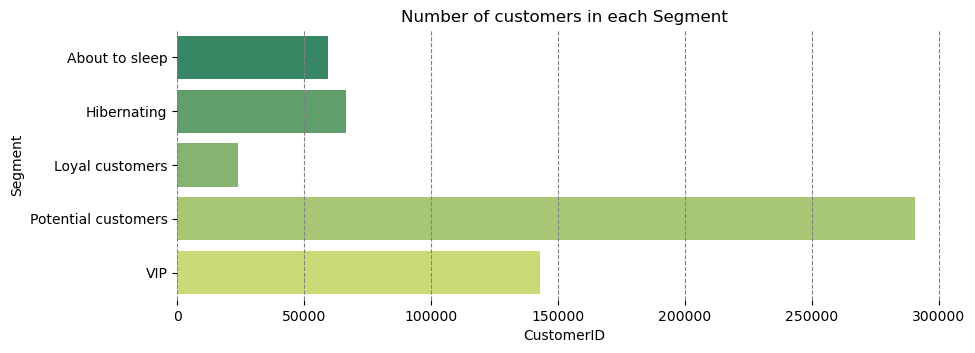

In [ ]:
fig, ax = plt.subplots(figsize=(10,3.5))
customer_segment = rfm.groupby('Segment')['CustomerID'].count().reset_index()

sns.barplot(x= "CustomerID", y= "Segment", orient= 'h', palette= 'summer', data = customer_segment)
sns.despine(bottom=True, left=True)
plt.grid(axis = 'x', color = 'gray', linestyle = '--')
ax.set(title= 'Number of customers in each Segment')

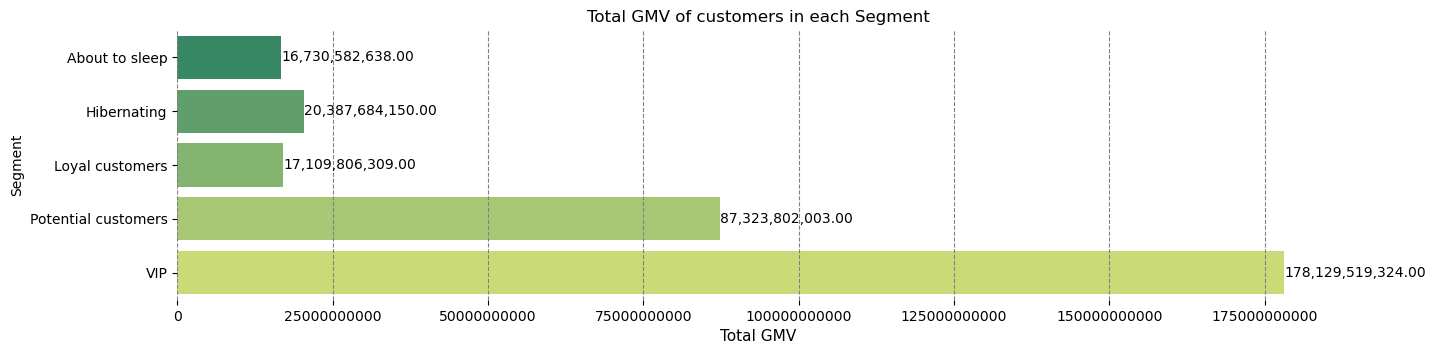

In [152]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(15,5))
customer_GMV_segment = rfm.groupby('Segment')['Monetary'].sum().reset_index()

sns.barplot(x= "Monetary", y= "Segment", orient= 'h', palette= 'summer', data = customer_GMV_segment)
sns.despine(bottom=True, left=True)
plt.grid(axis = 'x', color = 'gray', linestyle = '--')
ax.set(title= 'Total GMV of customers in each Segment')
plt.xlabel('Total GMV', size = 11)

# Add annotations with comma separation and two decimal places
for i, v in enumerate(customer_GMV_segment['Monetary']):
    plt.text(v + 1e6, i, f"{v:,.2f}", ha='left', va='center')

# Format y-axis labels to display two decimal places
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter("%.0f"))

In [83]:
agg_dict2 = {
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'sum'
}

df_analysis = rfm.groupby('Segment').agg(agg_dict2).sort_values(by='Recency').reset_index()
df_analysis.rename(columns={'CustomerID':'Customer'},inplace=True)
df_analysis['Percent_Customer'] = round(df_analysis['Customer'] / df_analysis['Customer'].sum(), 2)
df_analysis['Percent_Monetary'] = round(df_analysis['Monetary'] / df_analysis['Monetary'].sum(), 2)
df_analysis['Mean_GMV'] = round(df_analysis['Monetary'] / df_analysis['Customer'])
df_analysis

,Segment,Customer,Recency,Frequency,Monetary,Percent_Customer,Percent_Monetary,Mean_GMV
0,VIP,143120,111.24,3.97,178129519324,0.25,0.56,"1,244,617.00"
1,Potential customers,290772,185.33,1.00,87323802003,0.50,0.27,"300,317.00"
2,Loyal customers,23933,337.14,2.45,17109806309,0.04,0.05,"714,904.00"
3,About to sleep,59436,373.48,1.00,16730582638,0.10,0.05,"281,489.00"
4,Hibernating,66381,434.02,1.07,20387684150,0.11,0.06,"307,131.00"


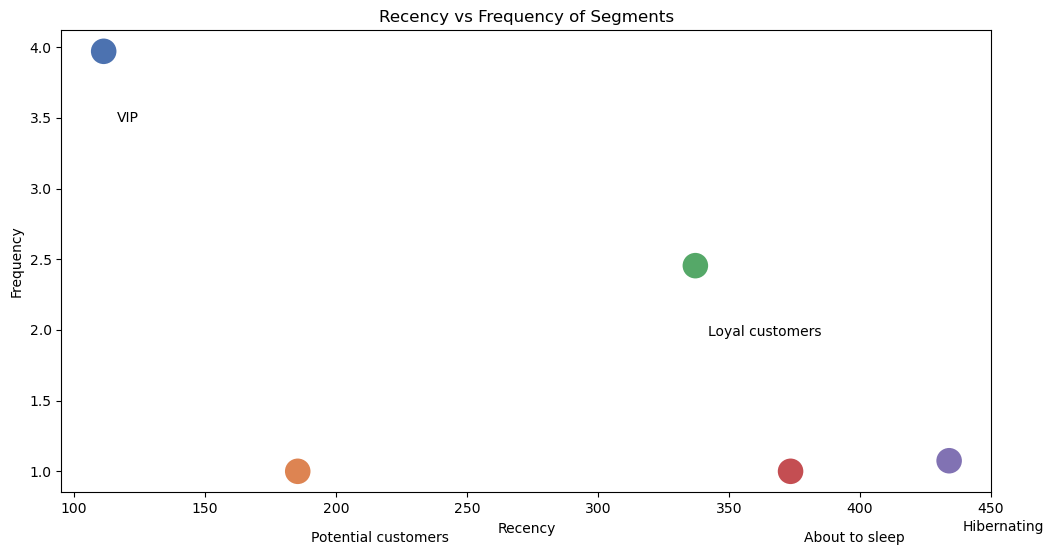

In [224]:
fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='Recency', y='Frequency', data=df_analysis, hue='Segment', s=400, palette="deep")

for i in range(len(df_analysis)):
     plot.text(df_analysis['Recency'][i]+5,
               df_analysis['Frequency'][i]-0.5,
               df_analysis['Segment'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Recency vs Frequency of Segments')
ax.get_legend().remove()
plt.show()

As expected, scatterplot visualizes the set of rules applied to generate RFM segments. 'VIP' and 'Loyal customers' are the ones who buy the most often, with VIPs being the most recent and frequent buyers. 'Potential customers' made purchases not long time ago but they are not frequent buyers yet. 'About to sleep' and 'Hibernating' customers are the ones with the lowest recency and frequency scores.

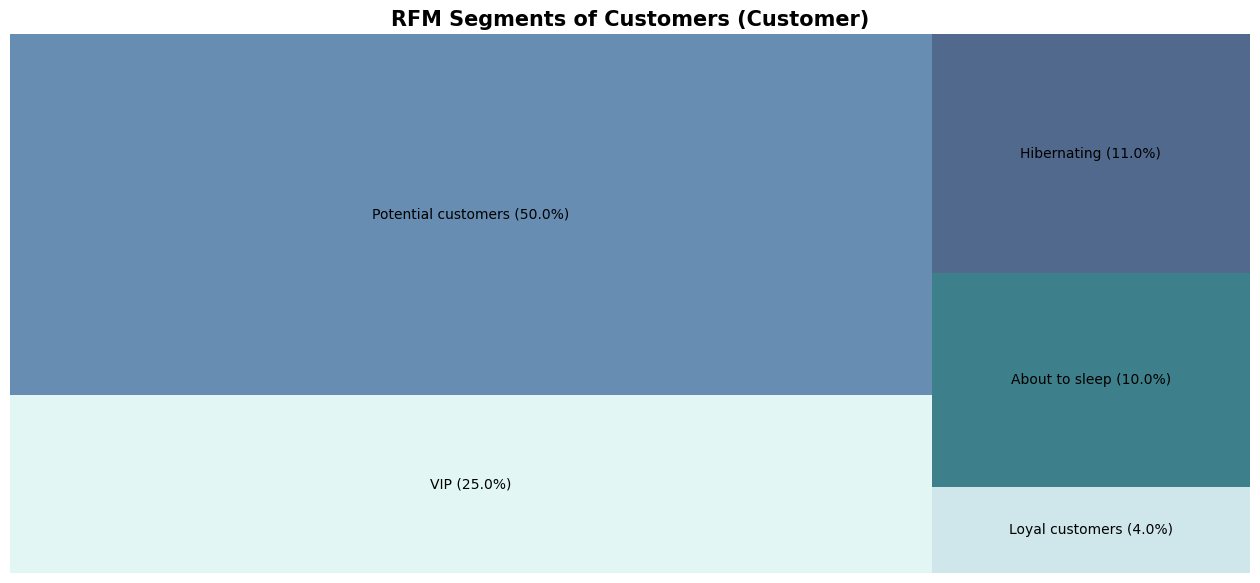

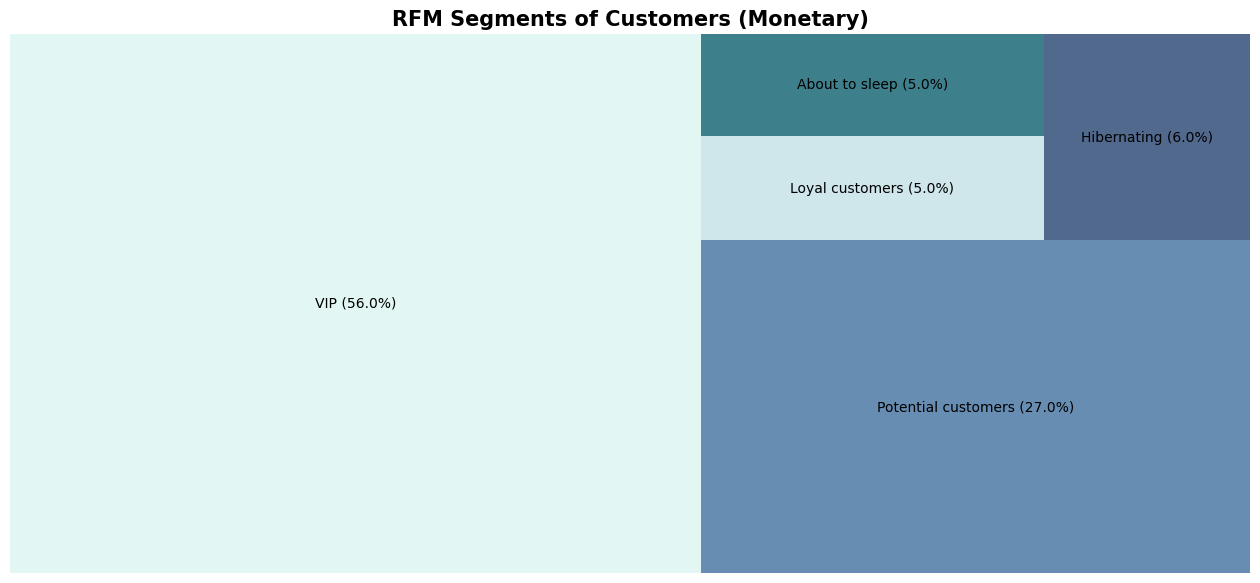

In [89]:
colors = ['#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#274472']

for col in ['Customer', 'Monetary']:
    labels = df_analysis['Segment'] + df_analysis['Percent_' +col].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,7))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col, size = 15, fontweight = 'bold')
    plt.axis('off')
    plt.show()

<Axes: xlabel='F', ylabel='R'>

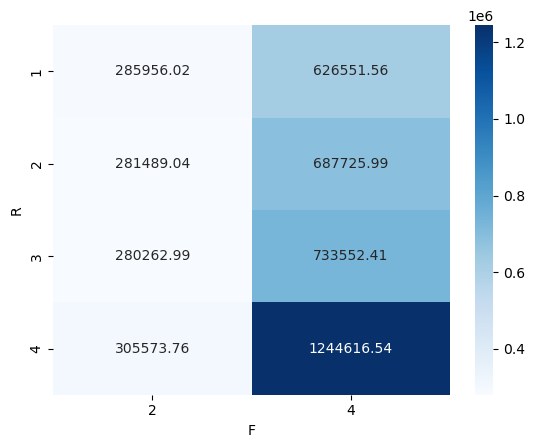

In [164]:
df_mean = rfm[['R', 'F', 'Monetary']].groupby(['R', 'F']).mean().reset_index()
df_mean = df_mean.pivot(values='Monetary', index='R', columns='F')

sns.heatmap(df_mean, cmap='Blues', annot=True, fmt=".2f")

#### Behavioral Analysis of RFM Segments

In [256]:
behavior = rfm.groupby('Segment').agg(
    Order_amount =('Frequency', 'sum'),
    Total_Gmv =('Monetary', 'sum')
).reset_index()
behavior

,Segment,Order_amount,Total_Gmv
0,About to sleep,59436,16730582638
1,Hibernating,71344,20387684150
2,Loyal customers,58745,17109806309
3,Potential customers,290772,87323802003
4,VIP,568278,178129519324


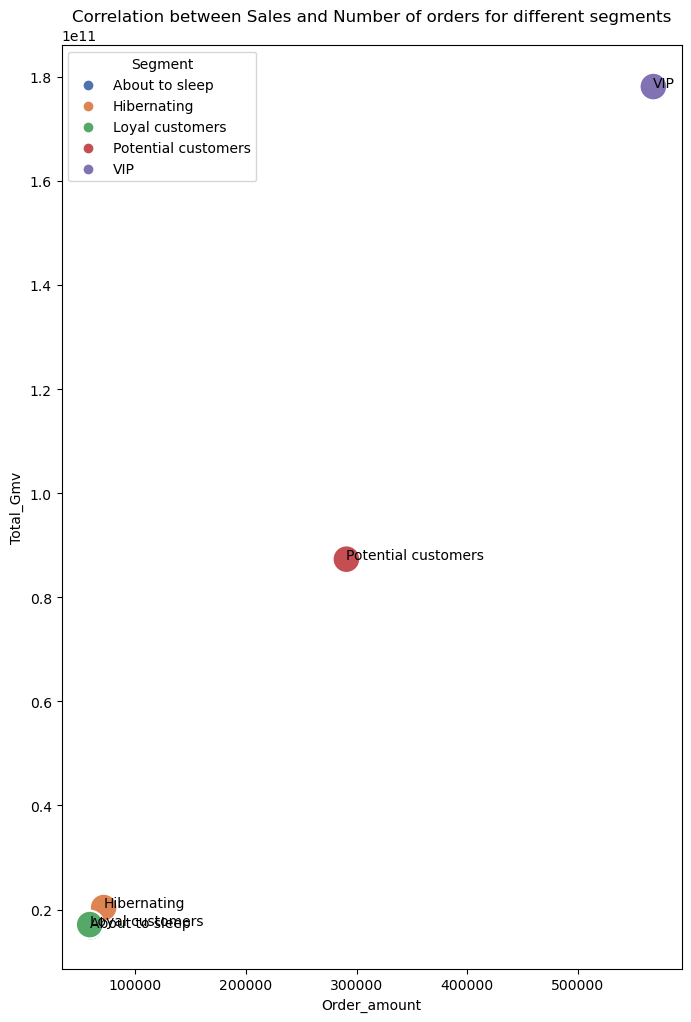

In [258]:
fig, ax = plt.subplots(figsize=(8,12))
plot = sns.scatterplot(x='Order_amount', y='Total_Gmv', data=behavior, hue='Segment', s=400, palette="deep")

for i in range(len(behavior)):
     plot.text(behavior['Order_amount'][i]+5,
               behavior['Total_Gmv'][i]-0.5,
               behavior['Segment'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Correlation between Sales and Number of orders for different segments')
plt.show()

Number of order of products in segments and sales are highly correlated with each other (linear relationship)

#### Outliner Processing

In [203]:
outliner = rfm[rfm['Monetary'] <= 567481.25]
outliner

,CustomerID,last_ord_date,Recency,Frequency,Monetary,R,F,M,RFM,Segment
0,0,2021-12-24,382,1,411663,2,2,3,223,About to sleep
1,1,2022-03-07,309,1,105503,3,2,1,321,Potential customers
2,10000,2023-01-07,3,1,145127,4,2,1,421,Potential customers
3,1000000,2021-11-07,429,1,190147,1,2,1,121,Hibernating
5,1000003,2022-12-25,16,1,370559,4,2,3,423,Potential customers
...,...,...,...,...,...,...,...,...,...,...
583637,99998,2022-03-06,310,1,159653,3,2,1,321,Potential customers
583638,999984,2022-01-05,370,1,176064,2,2,1,221,About to sleep
583639,999985,2022-07-01,193,1,415034,4,2,3,423,Potential customers
583640,999987,2021-11-01,435,1,168534,1,2,1,121,Hibernating


<Axes: ylabel='Monetary'>

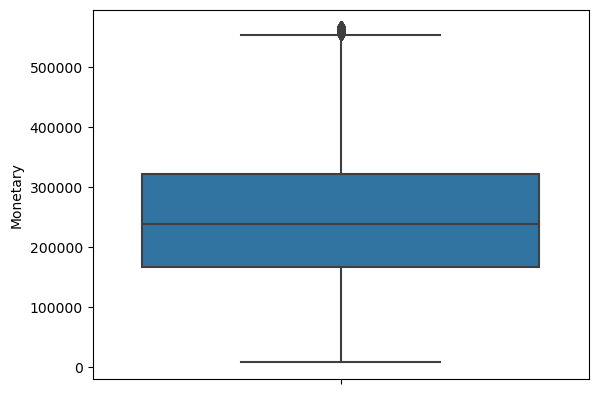

In [201]:
sns.boxplot(y=outliner['Monetary'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17304\3559544612.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outliner[outliner['Segment']==segment][col], label=segment)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17304\3559544612.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outliner[o

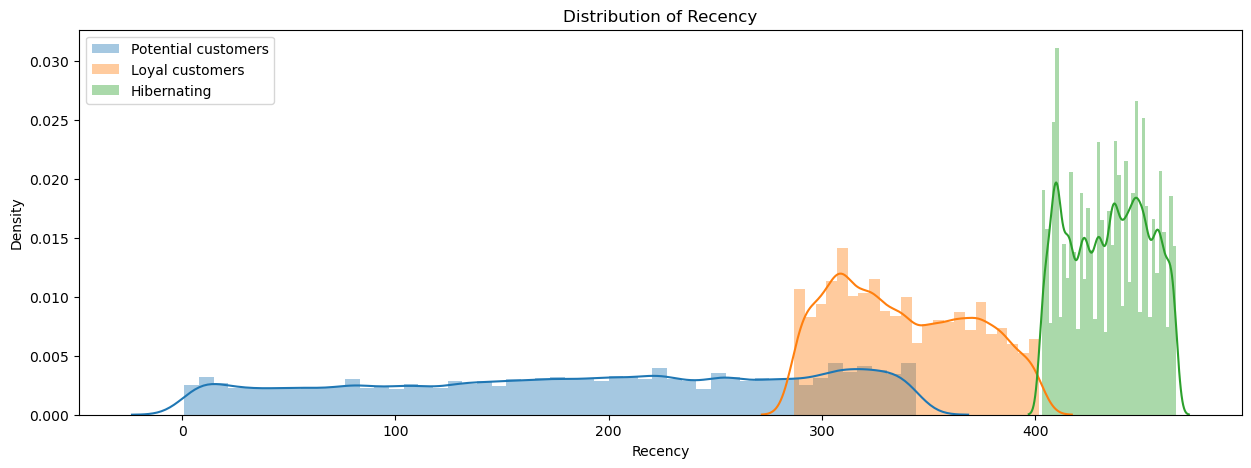

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17304\3559544612.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outliner[outliner['Segment']==segment][col], label=segment)
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17304\3559544612.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level funct

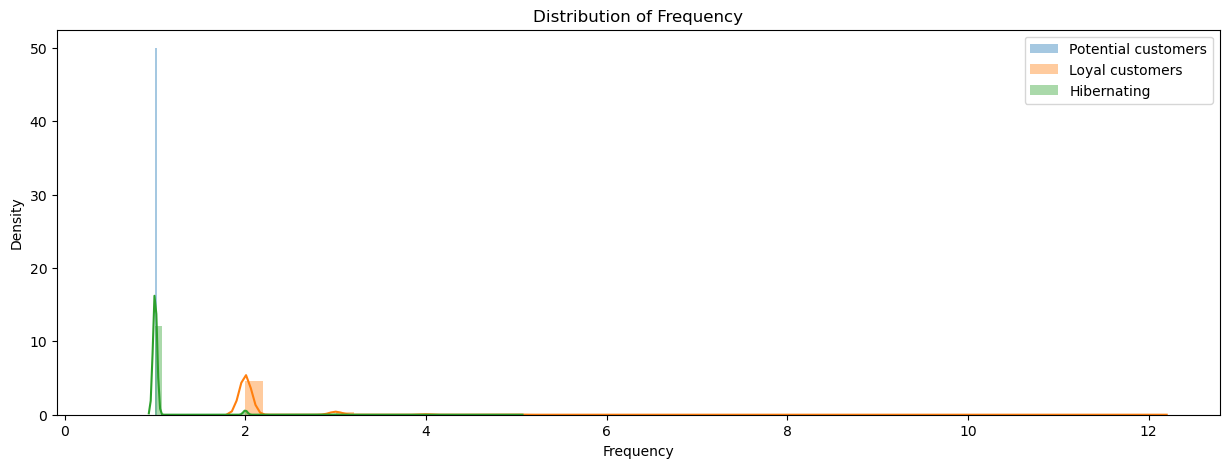

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17304\3559544612.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outliner[outliner['Segment']==segment][col], label=segment)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17304\3559544612.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outliner[o

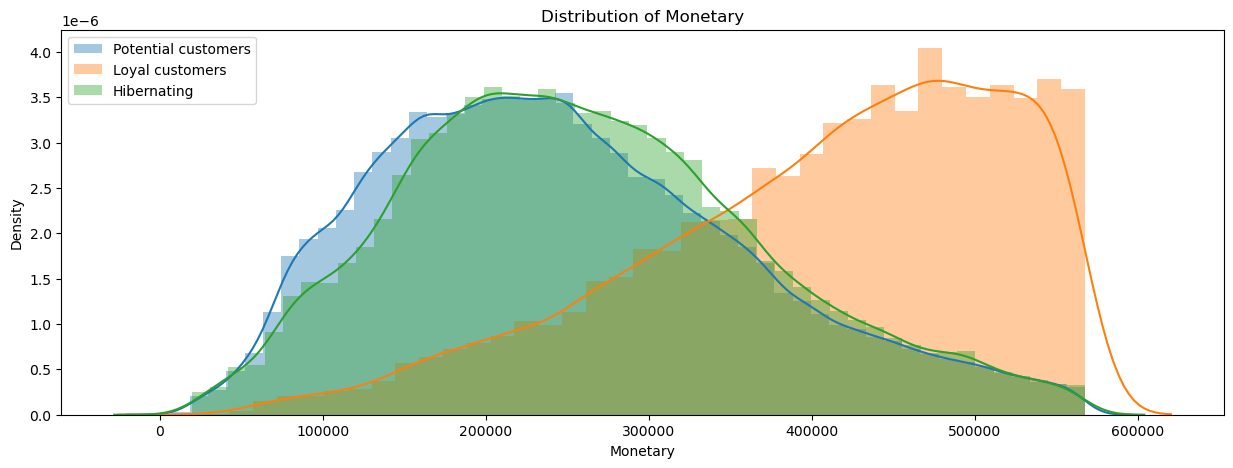

In [207]:
# colnames = ['Recency', 'Frequency',   'Monetary']
segments = ['Potential customers','Loyal customers','Hibernating']

for col in colnames:
    fig, ax = plt.subplots(figsize=(15,5))
    for segment in segments:
        sns.distplot(outliner[outliner['Segment']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()